# Novartis Data science challenge :

To predict whether the server is hacked or not.

In [1]:
#importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score # accuracy score
from sklearn.metrics import recall_score   # recall score

In [2]:
#loading the train data
train = pd.read_csv("Train.csv")
#Shape of train
print(train.shape) #printing the shape of train
print(train.describe()) #printing the statistics of train
print(train.info()) #printing the information of train
print(train.head()) #printing the first five rows of the train data

(23856, 18)
                X_1           X_2           X_3           X_4           X_5  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       0.483778     24.791206     24.637450      4.276744      2.455609   
std        1.439738     15.240231     15.135093      2.944672      1.963095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      7.000000      8.000000      2.000000      1.000000   
50%        0.000000     24.000000     24.000000      4.000000      3.000000   
75%        0.000000     36.000000     35.000000      6.000000      5.000000   
max        7.000000     52.000000     52.000000     10.000000      5.000000   

                X_6           X_7           X_8           X_9          X_10  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       6.154175      4.876509      0.972460      4.924128      1.244802   
std        4.471756      3.881931      

In [3]:
#loading the test data
test = pd.read_csv("Test.csv")
#Shape of train
print(test.shape) #printing the shape of train
print(test.describe())#printing the statistics of train
print(test.info()) #printing the information of train
print(test.head()) #printing the first five rows of the test data

(15903, 17)
                X_1           X_2           X_3           X_4           X_5  \
count  15903.000000  15903.000000  15903.000000  15903.000000  15903.000000   
mean       0.468088     24.722631     24.575049      4.284223      2.448469   
std        1.412112     15.228841     15.127451      2.974584      1.963372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      7.000000      8.000000      2.000000      1.000000   
50%        0.000000     24.000000     24.000000      4.000000      3.000000   
75%        0.000000     36.000000     35.000000      6.000000      5.000000   
max        7.000000     52.000000     52.000000     10.000000      5.000000   

                X_6           X_7           X_8           X_9          X_10  \
count  15903.000000  15903.000000  15903.000000  15903.000000  15903.000000   
mean       6.084890      4.862605      0.986732      4.908759      1.241212   
std        4.451117      3.854550      

In [4]:
#Dropping the Incident_ID and Date from train data
train = train.drop(['INCIDENT_ID','DATE'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 16 columns):
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15)
memory usage: 2.9 MB


In [5]:
#Verifying all the columns that has the null values in train data
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

X_12    182
dtype: int64

In the above code we can view that X_12 column has 182 null values,we will replace those null values with zero.

In [6]:
#Filled NaN values with "0" using fillna()
train["X_12"].fillna(0,inplace = True)
train.isnull().sum()

X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [7]:
#Verifying all the columns that has the null values in test data
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

X_12    127
dtype: int64

In [8]:
#Filled NaN values with "0" using fillna()
test["X_12"].fillna(0,inplace = True)
#train["X_12"].ffill(axis = "rows")
test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

We can view in the train and test info that X_12 is float64 let's convert it into int64

In [9]:
train["X_12"] = train["X_12"].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 16 columns):
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23856 non-null int32
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: int32(1), int64(15)
memory usage: 2.8 MB


In [10]:
test["X_12"] = test["X_12"].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15903 non-null int32
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: int32(1), int64(14), object(2)
memory usage: 1.9+ MB


In [11]:
#Removing the duplicated rows from train data
print("Train shape before removing the duplicates :" , train.shape)
train.drop_duplicates(keep='first', inplace=True)
print("Train shape After removing the duplicates :" , train.shape)

Train shape before removing the duplicates : (23856, 16)
Train shape After removing the duplicates : (18781, 16)


In [12]:
#Skewness of the train data
train.skew()

X_1                  3.651007
X_2                 -0.004833
X_3                 -0.004439
X_4                  0.063801
X_5                  0.055655
X_6                  0.986797
X_7                  0.866613
X_8                 17.272061
X_9                 -1.399578
X_10                31.606144
X_11                -0.872144
X_12                29.016244
X_13                -1.244572
X_14                 0.166869
X_15                -2.629338
MULTIPLE_OFFENSE    -4.032494
dtype: float64

# Exploratory Data Analysis ON TRAIN DATA :

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#Skewness of train data
sns.distplot(train.skew(),color='blue',axlabel ='Skewness')

Target Variable Distribution:

Our first step in Machine Learning should always be analyzing the target variable. MULTIPLE_OFFENSE is our given target/dependent variable. Let's analyse its distribution

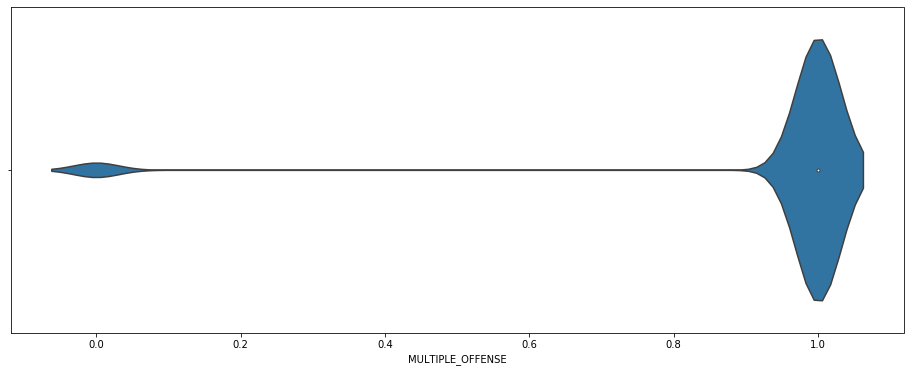

Skewness: -4.032494075008757
Kurtosis: 14.262527278767362


In [14]:
f,ax = plt.subplots(1,1,figsize=(16,6))
sns.violinplot(train['MULTIPLE_OFFENSE'])
plt.show()
#skewness and kurtosis
print("Skewness: {}".format(train['MULTIPLE_OFFENSE'].skew()))
print("Kurtosis: {}".format(train['MULTIPLE_OFFENSE'].kurt()))

In [15]:
print("Number of training Mutiple Offence : {} ".format(len(train)))
print("Offense Rate {:.4}%".format(train["MULTIPLE_OFFENSE"].mean()*100))

Number of training Mutiple Offence : 18781 
Offense Rate 94.79%


Let us visualize the Multiple Offense using pie chart

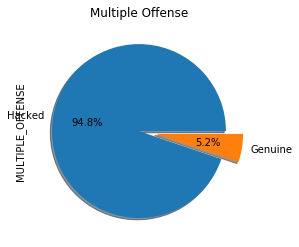

In [16]:
#Creating Pie Chart for the target variable
labels = ['Hacked', 'Genuine']
plt.title('Multiple Offense')
train['MULTIPLE_OFFENSE'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10)

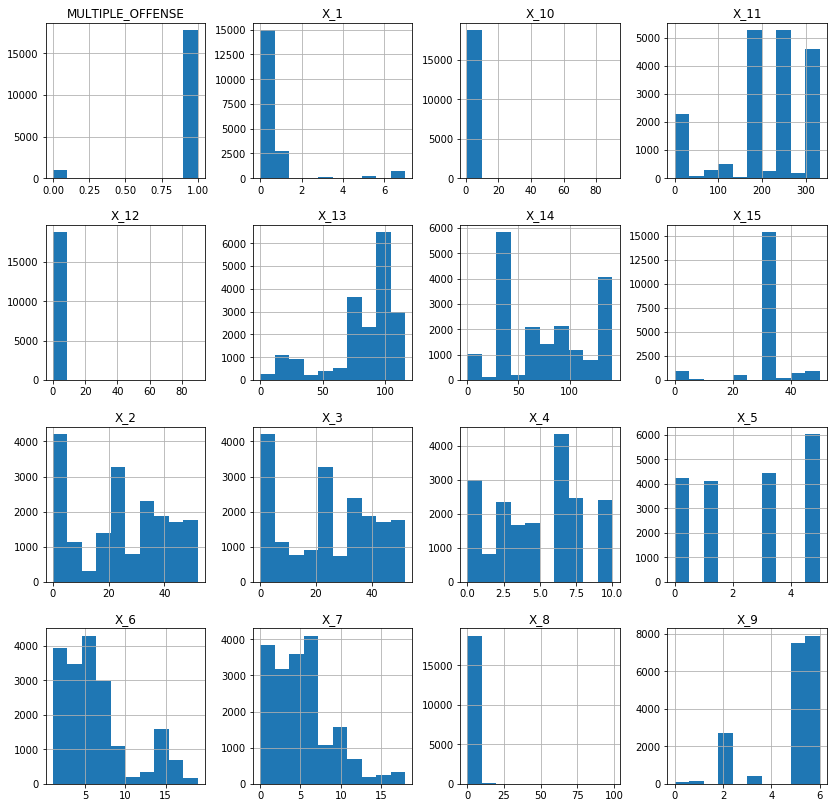

In [17]:
#histogram
train.hist(figsize=(14,14))
plt.show()

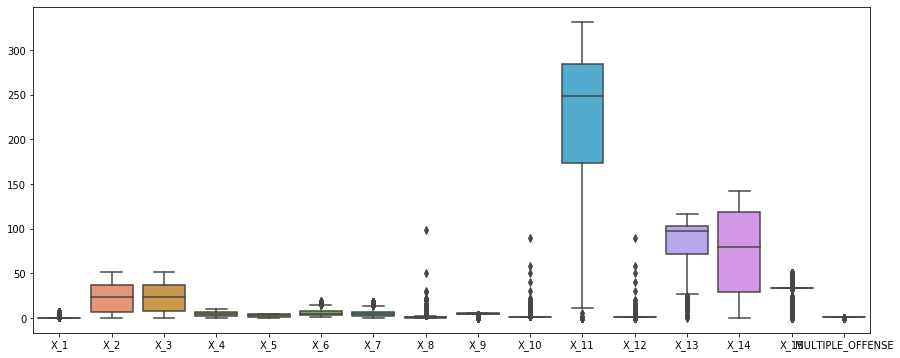

In [18]:
#Boxplot 
plt.subplots(figsize=(15, 6))
sns.boxplot(data = train, orient = 'v')

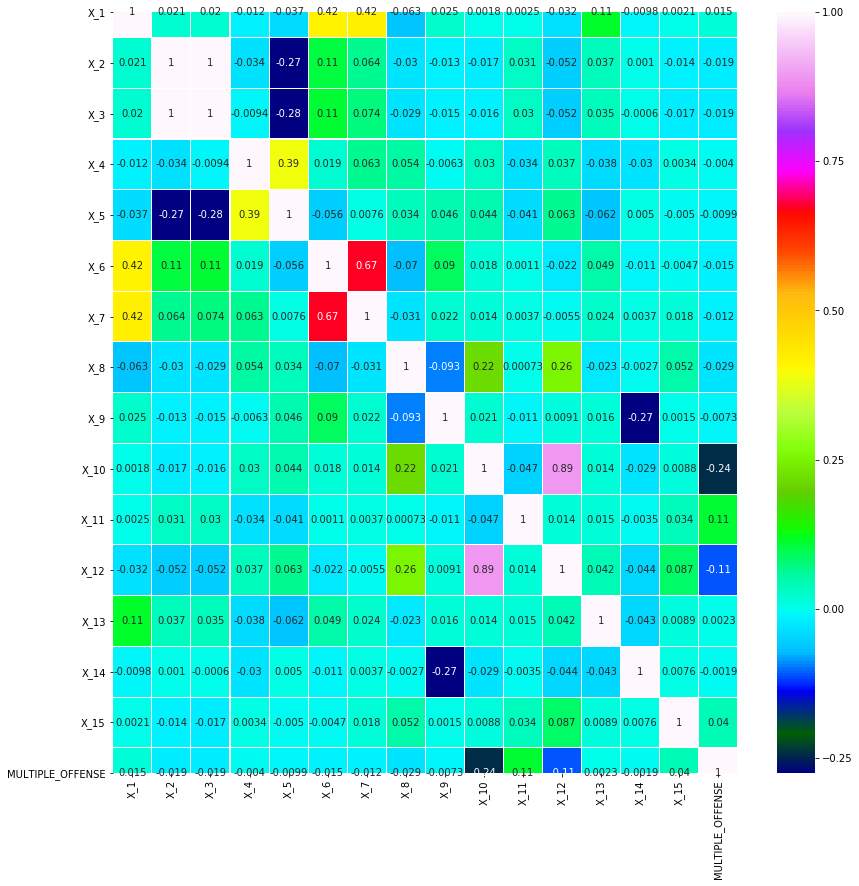

In [19]:
# create a correlation heatmap
sns.heatmap(train.corr(),annot=True, cmap='gist_ncar', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

In the above correlation plot we can clearly say that X_2 and X_3 are highly correlated,this is to check correlation of X_1 to X_15 correlations along with Multiple Offense.

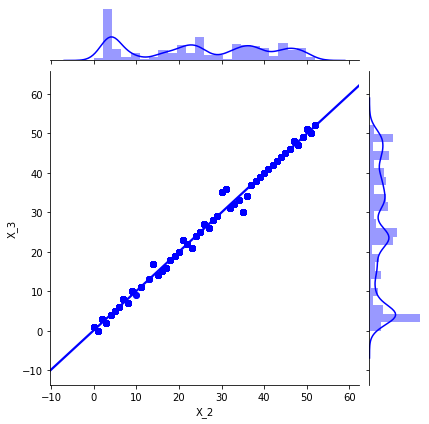

In [20]:
#High Correlation of X_2 and X_3 using joint plot
sns.jointplot(train['X_2'],train['X_3'], kind="reg", color="b")

# DATA MODELLING FOR PREDICTION :

In [21]:
X_train = train.iloc[:,:-1]
y_train = train["MULTIPLE_OFFENSE"]
#Dropping the Incident_ID and Date from test data
X_test = test.drop(['INCIDENT_ID','DATE'], axis=1)
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)

Shape of X_train :  (18781, 15)
Shape of y_train :  (18781,)
Shape of X_test :  (15903, 15)


# SMOTE:


In [24]:
#Synthetic minority oversampling technique to balance the imbalanced data.
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
from imblearn.over_sampling import SMOTE
sampler = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = sampler.fit_sample(X_train, y_train)
print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Before OverSampling, the shape of X_train: (18781, 15)
Before OverSampling, the shape of y_train: (18781,) 

Before OverSampling, counts of label '1': 17803
Before OverSampling, counts of label '0': 978 

After OverSampling, the shape of X_train: (35606, 15)
After OverSampling, the shape of y_train: (35606,) 



C:\Users\91798\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '1': 17803
After OverSampling, counts of label '0': 17803


In the above code we can cleary view that the target variable is well balanced.

In [25]:
#Spltting the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_sm, y_train_sm ,test_size=0.3, random_state=10)

In [26]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc   = sc.transform(X_val)
X_test_sc  = sc.transform(X_test)

# DATA MODELLING FOR PREDICTION :

In [27]:
# Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
svc = SVC()
svc.fit(X_train_sc, y_train)
y_pred = svc.predict(X_val_sc)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_svc = recall_score(y_pred, y_val)
print("Support Vector Classifier Accuracy Score:",acc_svc)
print('Support Vector Classifier Recall Score:',recall_svc)

Support Vector Classifier Accuracy Score: 95.62
Support Vector Classifier Recall Score: 0.9703561116458133


In [28]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
gbk = GradientBoostingClassifier()
gbk.fit(X_train_sc, y_train)
y_pred = gbk.predict(X_val_sc)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 99.36
Gradient Boosting Classifier Recall Score: 0.9949447668975847


In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
randomforest = RandomForestClassifier()
randomforest.fit(X_train_sc, y_train)
y_pred = randomforest.predict(X_val_sc)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_randomforest = recall_score(y_pred, y_val)
print("Random Forest Classifier Accuracy Score:",acc_randomforest)
print('Random Forest Classifier Recall Score:',recall_randomforest)

Random Forest Classifier Accuracy Score: 99.59
Random Forest Classifier Recall Score: 0.9981241793284562


In [30]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_sc, y_train)
y_pred = decisiontree.predict(X_val_sc)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_decisiontree = recall_score(y_pred, y_val)
print("Decision Tree Accuracy Score:",acc_decisiontree)
print('Decision Tree Recall Score:',recall_decisiontree)

Decision Tree Accuracy Score: 99.69
Decision Tree Recall Score: 0.9979416167664671


In [31]:
# KNN or k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_val_sc)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_knn = recall_score(y_pred, y_val)
print("KNN Classifier Accuracy Score:",acc_knn)
print('KNN Classifier Recall Score:',recall_knn)

KNN Classifier Accuracy Score: 95.4
KNN Classifier Recall Score: 0.994509963399756


In [32]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine', 
              'Random Forest', 
              'Decision Tree',
              'Gradient Boosting Classifier',
               'k-Nearest Neighbors Classifier'],
    'Accuracy Score': [acc_svc,acc_gbk, acc_randomforest,acc_decisiontree,acc_knn],
    'Recall Score'  :  [recall_svc,recall_gbk,recall_randomforest,recall_decisiontree,recall_knn]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Recall Score
3,Gradient Boosting Classifier,99.69,0.997942
2,Decision Tree,99.59,0.998124
1,Random Forest,99.36,0.994945
0,Support Vector Machine,95.62,0.970356
4,k-Nearest Neighbors Classifier,95.40,0.994510


#Submission

In [33]:
#I have chosen Gradient Boosting classifier amongst all classifiers
y_pred = gbk.predict(X_test_sc)
submission_df = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission GBK v1.csv', index=False)